# OASIS INFOBYTE TASK 1

# IRIS FLOWER CLASSIFICATION JANUARY 23

Training a machine learning model that can learn from the measurement of iris species and classify them.

In [1]:
#Prepared by; Seghosime Joshua
#Email; vanjosh8@gmail.com
#phone; +2347032803248

In [2]:
#importimg the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading the dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\Data Science\Datasets\iris.csv")

In [4]:
#viewing the first 10 dateset
df.head(10)

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
#viewing the last five rows
df.tail()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
#printing the number of columns
df.columns.values.tolist()

['Sepal Length (cm)',
 'Sepal Width (cm)',
 'Petal Length (cm)',
 'Petal Width (cm)',
 'Species']

In [7]:
#printing the general informaton of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sepal Length (cm)  150 non-null    float64
 1   Sepal Width (cm)   150 non-null    float64
 2   Petal Length (cm)  150 non-null    float64
 3   Petal Width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#checking the total number of rows and columns
df.shape

(150, 5)

Obviously there are 150 rows and 5 columns

In [9]:
#performing statistical analysis
df.describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
#check the total number of each species
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [11]:
#checking for missing values
df.isnull().sum()

Sepal Length (cm)    0
Sepal Width (cm)     0
Petal Length (cm)    0
Petal Width (cm)     0
Species              0
dtype: int64

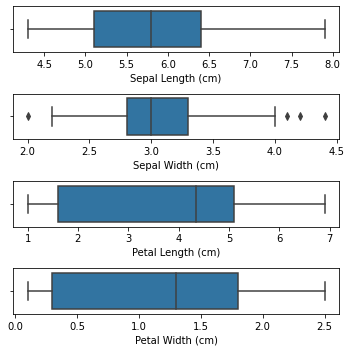

In [12]:
#Checking for outliers
fig, axs = plt.subplots(4, figsize=(5,5))
plt1 = sns.boxplot(df['Sepal Length (cm)'], ax=axs[0])
plt2 = sns.boxplot(df['Sepal Width (cm)'], ax=axs[1])
plt3 = sns.boxplot(df['Petal Length (cm)'], ax=axs[2])
plt4 = sns.boxplot(df['Petal Width (cm)'], ax=axs[3])
plt.tight_layout()

Sepal width has a huge outlier and must be fixed into the datatset be fit.

<AxesSubplot:xlabel='Sepal Width (cm)', ylabel='Density'>

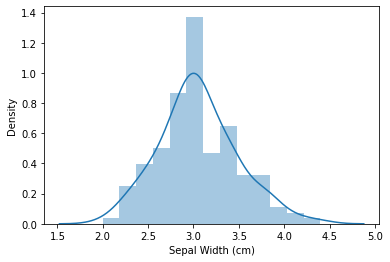

In [13]:
#removing or fixing outliers using IQR
#let's see the data distribution
sns.distplot(df['Sepal Width (cm)'])

In [14]:
#calculating the IQR
iqr = df['Sepal Width (cm)'].quantile(0.75) - df['Sepal Width (cm)'].quantile(0.25)

In [15]:
lower_bridge = df["Sepal Width (cm)"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Sepal Width (cm)"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

2.05
4.05


In [16]:
df.loc[df['Sepal Width (cm)']>=4, 'Sepal Width (cm)']=4

<AxesSubplot:xlabel='Sepal Width (cm)'>

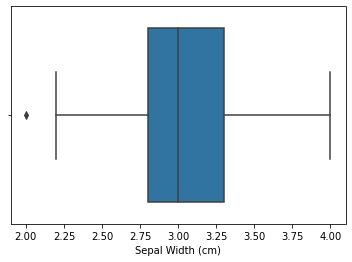

In [17]:
#Outliers have been fixed
sns.boxplot(df['Sepal Width (cm)'])

# Exploratory Data Analysis (EDA)

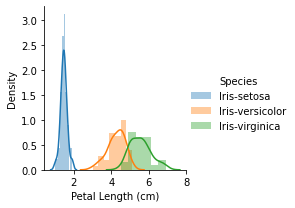

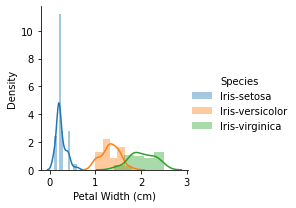

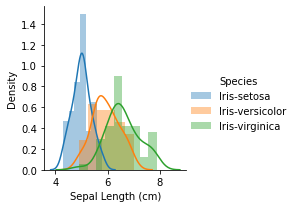

In [18]:
#performing EDA on the three classes
setosa = df.loc[df["Species"] == "Iris-setosa"]
virginica = df.loc[df["Species"] == "Iris-virginica"]
versicolor = df.loc[df["Species"] == "Iris-versicolor"]

sns.FacetGrid(df,
              hue="Species",
              size=3).map(sns.distplot,
                          "Petal Length (cm)").add_legend()
sns.FacetGrid(df,
              hue="Species",
              size=3).map(sns.distplot,
                          "Petal Width (cm)").add_legend()
sns.FacetGrid(df,
              hue="Species",
              size=3).map(sns.distplot,
                          "Sepal Length (cm)").add_legend()
plt.show()

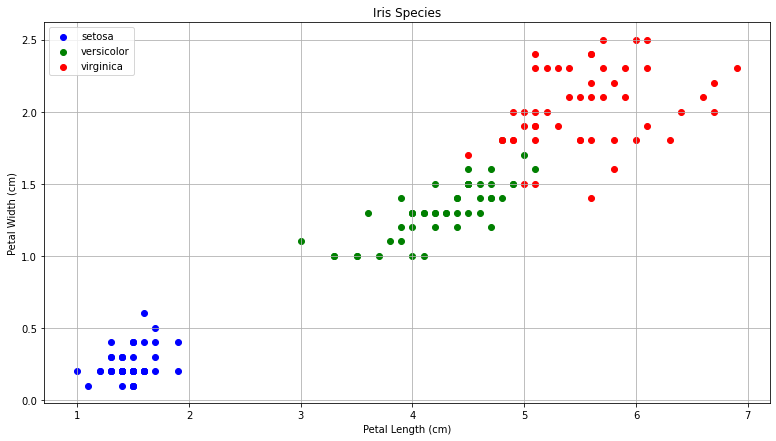

In [19]:
#performing EDA on the three classes
setosa = df[df.Species == "Iris-setosa"]
virginica = df[df.Species == "Iris-virginica"]
versicolor = df[df.Species == "Iris-versicolor"]

#mending the size of the plot
fig, ax = plt.subplots()
fig.set_size_inches(13, 7)

#input labels and scatter points
ax.scatter(setosa['Petal Length (cm)'], setosa['Petal Width (cm)'], label='setosa', facecolor='blue')
ax.scatter(versicolor['Petal Length (cm)'], versicolor['Petal Width (cm)'], label='versicolor', facecolor='green')
ax.scatter(virginica['Petal Length (cm)'], virginica['Petal Width (cm)'], label='virginica', facecolor='red')

#setting the axis
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.grid()
ax.set_title('Iris Species')
ax.legend()

Virginica has bigger or larger petals, and subsequently versicolor and setosa.

In [20]:
#declaring X and y variable or features
#since we need measurement lets drop the Species
X = df.drop(['Species'], axis = 1)

In [21]:
print(X)

     Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [22]:
#convert X to numpy array
X = X.to_numpy()[:, (2,3)]

In [23]:
#checking the new array
print(X)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.1]
 [1.2 0.2]
 [1.3 0.2]
 [1.5 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [24]:
#import iris data library
from sklearn.datasets import load_iris

In [25]:
iris = load_iris()

In [26]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
#declaring the target variable
y = iris.target

In [28]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Modeling

# Decision Tree Classifier

In [29]:
#building the classification model
#importing the libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
#checking the number of rows and columns
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(100, 2) (50, 2)
(100,) (50,)


In [31]:
#training the model
treemodel = DecisionTreeClassifier()
treemodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
#predicting the future class
ypred = treemodel.predict(X_test)
print(ypred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]


[Text(0.5454545454545454, 0.9285714285714286, 'X[1] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.45454545454545453, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6363636363636364, 0.7857142857142857, 'X[1] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.45454545454545453, 0.6428571428571429, 'X[0] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.36363636363636365, 0.5, 'X[1] <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.18181818181818182, 0.35714285714285715, 'X[0] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.09090909090909091, 0.21428571428571427, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.2727272727272727, 0.21428571428571427, 'X[1] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.18181818181818182, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.36363636363636365, 0.07142857142857142, 'gini = 0.0

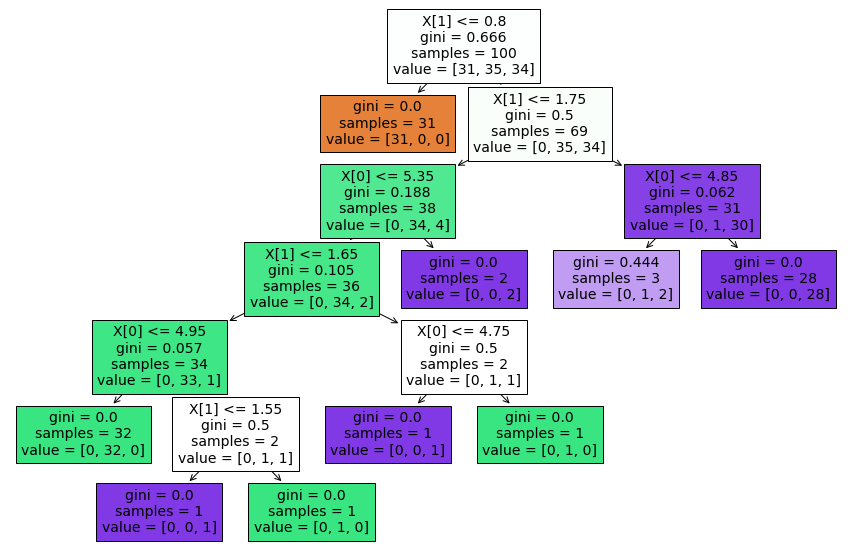

In [33]:
#visualizing the decision tree graphically
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(treemodel, filled=True)

# Hyperparameter Tunning(postprunning technique)

In [44]:
#hyperparameter tunning(postprunning technique)
treemodel = DecisionTreeClassifier(max_depth=2)

In [45]:
treemodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[0] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'X[1] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

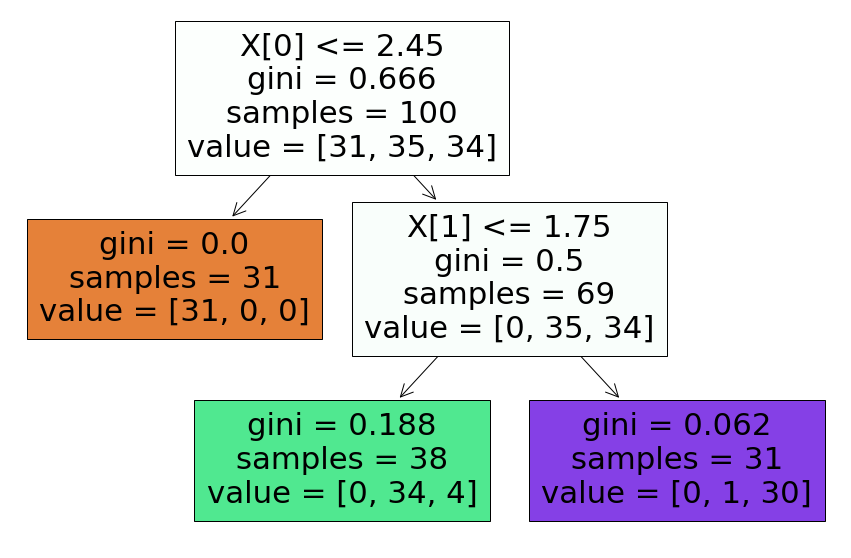

In [46]:
#plotting the tree again
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(treemodel, filled=True)

In [47]:
#predicting with the treemodel
y_pred = treemodel.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [49]:
#evaluating the model score
score = accuracy_score(y_pred, y_test)
print(score)
print(classification_report(y_pred, y_test))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [60]:
#ploting the confusion matrix
confusion = confusion_matrix(y_test, ypred)
confusion

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]], dtype=int64)

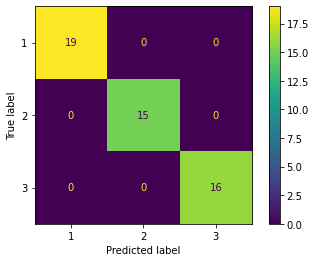

In [61]:
#visualizing the matrix
cmd = ConfusionMatrixDisplay(confusion, display_labels = [1, 2, 3])
cmd.plot()

# Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [38]:
#create the model
rfc = RandomForestClassifier() 
# fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
#predicting future values
y_pred_rfc = rfc.predict(X_test)
print(y_pred_rfc)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]


In [40]:
#checking the model accuracy
print("Random Forest Classifier training accuracy score is : {} %".format(round(rfc.score(X_train, y_train)*100, 2)))
print("Random Forest model's accuracy score is : {} %".format(round(accuracy_score(y_test, y_pred_rfc)*100, 2)))

Random Forest Classifier training accuracy score is : 99.0 %
Random Forest model's accuracy score is : 98.0 %
